<a href="https://colab.research.google.com/github/jcallaghan2020/deep-learning/blob/main/deep_learning_a5_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

John Callaghan z23482418 https://colab.research.google.com/drive/1WNN2Sn_L23A-Cpf0mSKeFGufONBTLRv7?usp=sharing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_fun(features,labels,classes):
  plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs', 
         features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'g^',markersize=15)
  #plt.axis([-2,2,-2,2])
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
  plt.show()

def plot_fun_thr(features,labels,thre_parms,classes):
  #ploting the data points
  plt.plot(features[labels[:]==classes[0],0], features[labels[:]==classes[0],1], 'rs',
           features[labels[:]==classes[1],0], features[labels[:]==classes[1],1], 'g^', 
           markersize=15)
  #plt.axis([-1,2,-1,2])
  #ploting the seperating line
  x1 = np.linspace(-2,2,50)
  x2 = -(thre_parms[0]*x1+thre_parms[2])/thre_parms[1] 
                      #a X1 + b X2 + c=0 --> x2 = -(a X1 + c)/b
  plt.plot(x1, x2, '-r')
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['Class'+str(classes[0]), 'Class'+str(classes[1])])
  #plt.pause(0.5)
  #plt.show()

def plot_curve(accuracy_train, loss_train):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Training loss')

  plt.show()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 2)                 6         
                                                                 
 dense_29 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


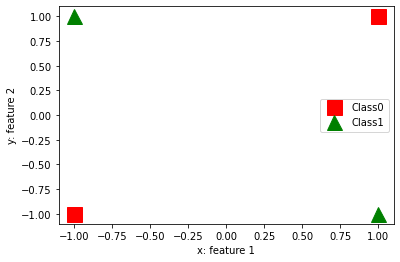

Epoch 1/200
4/4 [==============================] - 0s 4ms/step - loss: 0.7597 - accuracy: 0.5000
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7280 - accuracy: 0.2500
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5000
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5000
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6532 - accuracy: 0.5000
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6351 - accuracy: 0.7500
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.7500
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5987 - accuracy: 0.7500
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5819 - accuracy: 0.7500
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5655 - accuracy: 0.7500
Epoch 11/200
4/4 [===========

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

#defining the model
model_a=Sequential()
model_a.add(Dense(input_dim=2, units=2, activation='tanh'))
model_a.add(Dense(units=1, activation='sigmoid'))
model_a.summary()

#compiling the model
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model_a.compile(loss='binary_crossentropy',
              optimizer=opt, 
              metrics=['accuracy'])

#Loading the data and normalization
features=np.array([[0,0], [0,1], [1,0], [1,1]])
labels=np.array([0,1,1,0], dtype=np.uint8)
classes=[0,1]

# Data normalization is essential for multilayer networks
# You can experiment with and without data normalization and observe the model behavior
features = (features-np.mean(features,axis=0))/np.std(features,axis=0) #normalization
plot_fun(features,labels,classes)

history=model_a.fit(features, labels,
          batch_size=1,
          epochs=200,
          verbose=1)

The given data points need two lines in order to be classified correctly


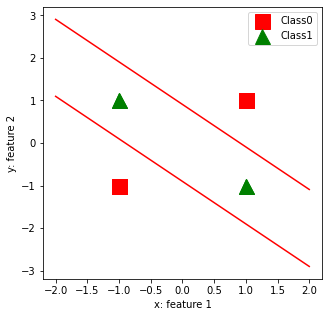

In [ ]:
weights=model_a.layers[0].get_weights() 
plt.figure(figsize=[5,5])
for node_i in range(weights[0].shape[1]):
  thre_parms=np.array(weights[0][:,node_i])#This first item is the weights for the inputs 
  thre_parms=np.append(thre_parms, weights[1][node_i]) #second item the weights for the bias
  plot_fun_thr(features,labels,thre_parms,classes)
plt.show()

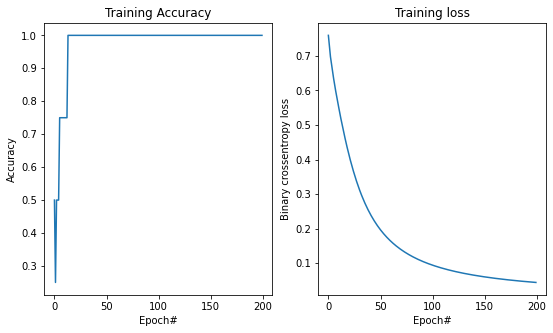

In [ ]:
plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 4)                 12        
                                                                 
 dense_31 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


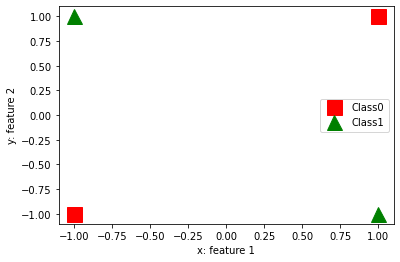

Epoch 1/400
4/4 [==============================] - 0s 3ms/step - loss: 0.8078 - accuracy: 0.5000
Epoch 2/400
4/4 [==============================] - 0s 3ms/step - loss: 0.7913 - accuracy: 0.5000
Epoch 3/400
4/4 [==============================] - 0s 4ms/step - loss: 0.7767 - accuracy: 0.2500
Epoch 4/400
4/4 [==============================] - 0s 3ms/step - loss: 0.7644 - accuracy: 0.5000
Epoch 5/400
4/4 [==============================] - 0s 3ms/step - loss: 0.7549 - accuracy: 0.5000
Epoch 6/400
4/4 [==============================] - 0s 2ms/step - loss: 0.7463 - accuracy: 0.2500
Epoch 7/400
4/4 [==============================] - 0s 3ms/step - loss: 0.7379 - accuracy: 0.5000
Epoch 8/400
4/4 [==============================] - 0s 4ms/step - loss: 0.7290 - accuracy: 0.5000
Epoch 9/400
4/4 [==============================] - 0s 3ms/step - loss: 0.7209 - accuracy: 0.2500
Epoch 10/400
4/4 [==============================] - 0s 5ms/step - loss: 0.7120 - accuracy: 0.5000
Epoch 11/400
4/4 [===========

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

#defining the model
model_a=Sequential()
model_a.add(Dense(input_dim=2, units=4, activation='tanh'))
model_a.add(Dense(units=1, activation='sigmoid'))
model_a.summary()

#compiling the model
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
model_a.compile(loss='binary_crossentropy',
              optimizer=opt, 
              metrics=['accuracy'])

#Loading the data and normalization
features=np.array([[0,0], [0,1], [1,0], [1,1]])
labels=np.array([0,1,1,0], dtype=np.uint8)
classes=[0,1]

# Data normalization is essential for multilayer networks
# You can experiment with and without data normalization and observe the model behavior
features = (features-np.mean(features,axis=0))/np.std(features,axis=0) #normalization
plot_fun(features,labels,classes)

history=model_a.fit(features, labels,
          batch_size=1,
          epochs= 400,
          verbose=1)

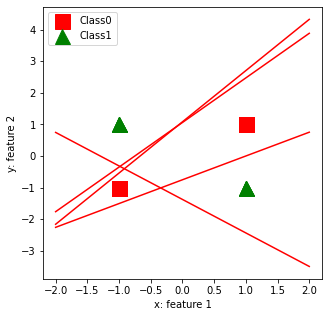

In [ ]:
weights=model_a.layers[0].get_weights() 
plt.figure(figsize=[5,5])
for node_i in range(weights[0].shape[1]):
  thre_parms=np.array(weights[0][:,node_i])#This first item is the weights for the inputs 
  thre_parms=np.append(thre_parms, weights[1][node_i]) #second item the weights for the bias
  plot_fun_thr(features,labels,thre_parms,classes)
plt.show()

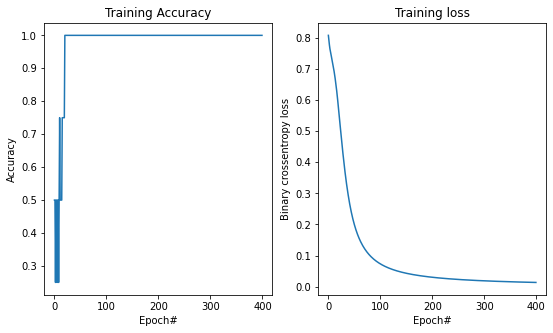

In [ ]:
plt.figure(figsize=[9,5])
acc_curve=np.array(history.history['accuracy'])
loss_curve=np.array(history.history['loss'])
plot_curve(acc_curve,loss_curve)

Adding more nodes seems unnecessary, the given data points are classified well with just 2.


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('deep_learning_a5_Q1.ipynb')

--2022-03-28 00:50:03--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-03-28 00:50:03 (29.8 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/deep_learning_a5_Q1.ipynb to pdf
[NbConvertApp] Support files will be in deep_learning_a5_Q1_files/
[NbConvertApp] Making directory ./deep_learning_a5_Q1_files
[NbConvertApp] Making directory ./deep_learning_a5_Q1_files
[NbConvertApp] Making directory ./deep_learning_a5_Q1_files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'